## Tratamento de dados

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
print(df.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()
df['sex'] = label_enconder.fit_transform(df['sex'])
df['smoker'] = label_enconder.fit_transform(df['smoker'])
df['time'] = label_enconder.fit_transform(df['time'])
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,0,3
240,27.18,2.00,0,1,Sat,0,2
241,22.67,2.00,1,1,Sat,0,2
242,17.82,1.75,1,0,Sat,0,2


In [ ]:
df_dummies = pd.get_dummies(df['day'])
df_dummies = df_dummies.astype(float)
df = pd.concat([df, df_dummies], axis=1)
df = df.drop('day', axis=1)
df

,total_bill,tip,sex,smoker,time,size,Fri,Sat,Sun,Thur
0,16.99,1.01,0,0,0,2,0.0,0.0,1.0,0.0
1,10.34,1.66,1,0,0,3,0.0,0.0,1.0,0.0
2,21.01,3.50,1,0,0,3,0.0,0.0,1.0,0.0
3,23.68,3.31,1,0,0,2,0.0,0.0,1.0,0.0
4,24.59,3.61,0,0,0,4,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,3,0.0,1.0,0.0,0.0
240,27.18,2.00,0,1,0,2,0.0,1.0,0.0,0.0
241,22.67,2.00,1,1,0,2,0.0,1.0,0.0,0.0
242,17.82,1.75,1,0,0,2,0.0,1.0,0.0,0.0


In [ ]:
print(df.dtypes)

total_bill    float64
tip           float64
sex             int64
smoker          int64
time            int64
size            int64
Fri           float64
Sat           float64
Sun           float64
Thur          float64
dtype: object


In [ ]:
df['tip_pct'] = (df['tip'] / df['total_bill']) * 100
tip_pct_median = df['tip_pct'].median()

df['tip_class'] = pd.cut(df['tip_pct'], bins=[0, tip_pct_median, 100], labels=['0', '1'])
df['tip_class'] = label_enconder.fit_transform(df['tip_class'])

print("Percentual medio da gorjeta:",tip_pct_median)
print(df)

Percentual medio da gorjeta: 15.476977125802577
     total_bill   tip  sex  smoker  time  size  Fri  Sat  Sun  Thur  \
0         16.99  1.01    0       0     0     2  0.0  0.0  1.0   0.0   
1         10.34  1.66    1       0     0     3  0.0  0.0  1.0   0.0   
2         21.01  3.50    1       0     0     3  0.0  0.0  1.0   0.0   
3         23.68  3.31    1       0     0     2  0.0  0.0  1.0   0.0   
4         24.59  3.61    0       0     0     4  0.0  0.0  1.0   0.0   
..          ...   ...  ...     ...   ...   ...  ...  ...  ...   ...   
239       29.03  5.92    1       0     0     3  0.0  1.0  0.0   0.0   
240       27.18  2.00    0       1     0     2  0.0  1.0  0.0   0.0   
241       22.67  2.00    1       1     0     2  0.0  1.0  0.0   0.0   
242       17.82  1.75    1       0     0     2  0.0  1.0  0.0   0.0   
243       18.78  3.00    0       0     0     2  0.0  0.0  0.0   1.0   

       tip_pct  tip_class  
0     5.944673          0  
1    16.054159          1  
2    16.658734 

## Arvore de Decisão

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', 'Fri', 'Sat', 'Sun','Thur']], df[['tip_class']], test_size = 0.5)


In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier()
regressor.fit(X_train, y_train.values.ravel())
y_pred = regressor.predict(X_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8770491803278688


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Lista de critérios a serem testados
criterios = ['gini', 'log_loss']

for criterio in criterios:
    # Criação do modelo com o critério atual
    clf = DecisionTreeClassifier(criterion=criterio)

    # Validação cruzada para estimar a performance de forma mais robusta
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"Critério: {criterio}")
    print(f"Accuracy (média da validação cruzada): {scores.mean()}")
    print(f"Desvio padrão: {scores.std()}")
    print()

    # Treinamento do modelo no conjunto de treinamento inteiro
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy no conjunto de teste: {accuracy}")
    print("-----------------------------------")


Critério: gini
Accuracy (média da validação cruzada): 0.8523333333333334
Desvio padrão: 0.10590142166709147

Accuracy no conjunto de teste: 0.8770491803278688
-----------------------------------
Critério: log_loss
Accuracy (média da validação cruzada): 0.8513333333333334
Desvio padrão: 0.08557907324678025

Accuracy no conjunto de teste: 0.8770491803278688
-----------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

# Lista de critérios a serem testados
criterios = ['gini', 'log_loss']
max_depths = list(range(1, 11))

# Dicionário para armazenar as acurácias e log_loss
resultados = {'accuracy': {}, 'log_loss': {}}

for criterio in criterios:
    resultados['accuracy'][criterio] = []
    resultados['log_loss'][criterio] = []
    for depth in max_depths:
        clf = DecisionTreeClassifier(criterion=criterio, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        logloss = log_loss(y_test, y_pred_proba)
        resultados['accuracy'][criterio].append(accuracy)
        resultados['log_loss'][criterio].append(logloss)

# Encontrando os melhores valores
for criterio in criterios:
    best_accuracy_index = np.argmax(resultados['accuracy'][criterio])
    best_log_loss_index = np.argmin(resultados['log_loss'][criterio])
    best_accuracy = resultados['accuracy'][criterio][best_accuracy_index]
    best_log_loss = resultados['log_loss'][criterio][best_log_loss_index]
    best_depth_accuracy = max_depths[best_accuracy_index]
    best_depth_log_loss = max_depths[best_log_loss_index]

    print(f"Critério: {criterio}")
    print(f"Melhor acurácia: {best_accuracy:.2f} (depth={best_depth_accuracy})")
    print(f"Menor log loss: {best_log_loss:.2f} (depth={best_depth_log_loss})")
    print("-----------------------------------")

# ... (seu código anterior)

    for depth, accuracy in zip(max_depths, resultados['accuracy'][criterio]):
        print(f"max_depth={depth}, Accuracy={accuracy:.3f}")


Critério: gini
Melhor acurácia: 0.90 (depth=7)
Menor log loss: 0.79 (depth=1)
-----------------------------------
max_depth=1, Accuracy=0.566
max_depth=2, Accuracy=0.680
max_depth=3, Accuracy=0.738
max_depth=4, Accuracy=0.803
max_depth=5, Accuracy=0.893
max_depth=6, Accuracy=0.885
max_depth=7, Accuracy=0.902
max_depth=8, Accuracy=0.885
max_depth=9, Accuracy=0.885
max_depth=10, Accuracy=0.885
Critério: log_loss
Melhor acurácia: 0.90 (depth=7)
Menor log loss: 0.79 (depth=1)
-----------------------------------
max_depth=1, Accuracy=0.566
max_depth=2, Accuracy=0.680
max_depth=3, Accuracy=0.738
max_depth=4, Accuracy=0.803
max_depth=5, Accuracy=0.893
max_depth=6, Accuracy=0.885
max_depth=7, Accuracy=0.902
max_depth=8, Accuracy=0.885
max_depth=9, Accuracy=0.885
max_depth=10, Accuracy=0.885


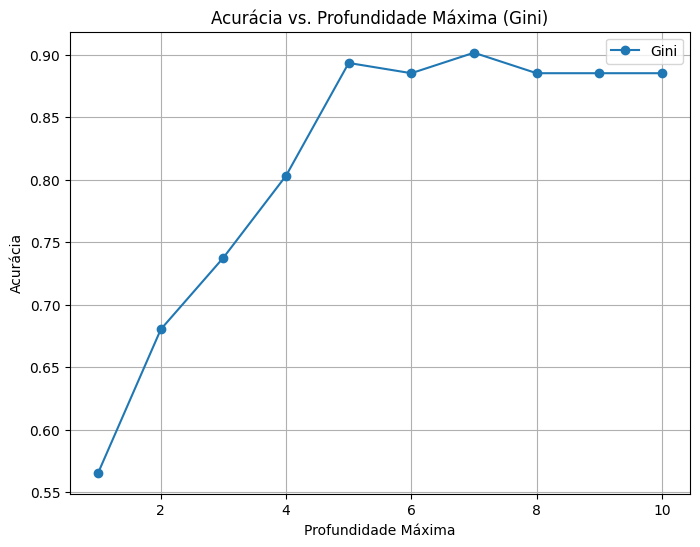

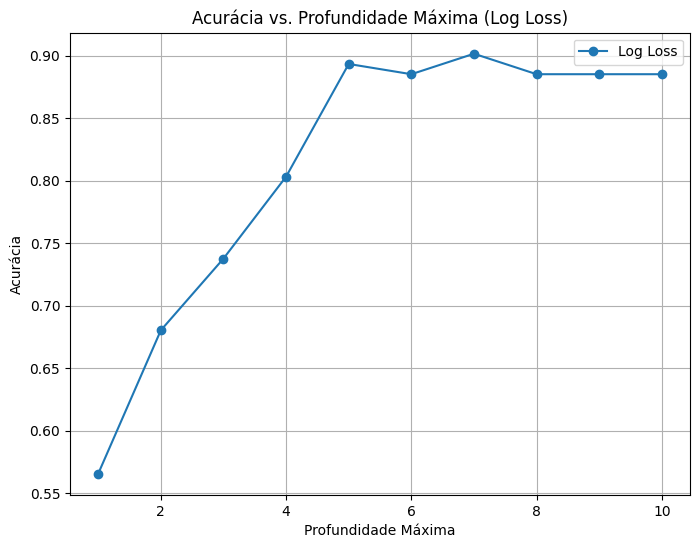

In [ ]:
# Plotando o gráfico para o critério Gini
plt.figure(figsize=(8, 6))
plt.plot(max_depths, resultados['accuracy']['gini'], marker='o', label='Gini')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. Profundidade Máxima (Gini)')
plt.grid(True)
plt.legend()
plt.show()

# Plotando o gráfico para o critério Log Loss
plt.figure(figsize=(8, 6))
plt.plot(max_depths, resultados['accuracy']['log_loss'], marker='o', label='Log Loss')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. Profundidade Máxima (Log Loss)')
plt.grid(True)
plt.legend()
plt.show()

## Floresta Aleatoria

In [ ]:
# Hiperparâmetros a serem testados
n_estimators_values = [10, 100, 1000]
criterios = ['gini', 'log_loss']

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# Dicionário para armazenar os resultados
resultados = {}

# Loop para testar diferentes combinações de hiperparâmetros
for n_estimators in n_estimators_values:
    for criterio in criterios:
        # Cria e treina o modelo
        rf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterio, random_state=42)
        rf.fit(X_train, y_train)

        # Faz previsões e calcula a acurácia
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        resultados[(n_estimators, criterio)] = accuracy

# Imprime os resultados
for (n_estimators, criterio), accuracy in resultados.items():
    print(f"n_estimators={n_estimators}, criterio={criterio}, acurácia={accuracy}")

n_estimators=10, criterio=gini, acurácia=0.7786885245901639
n_estimators=10, criterio=log_loss, acurácia=0.7868852459016393
n_estimators=100, criterio=gini, acurácia=0.7704918032786885
n_estimators=100, criterio=log_loss, acurácia=0.7377049180327869
n_estimators=1000, criterio=gini, acurácia=0.7295081967213115
n_estimators=1000, criterio=log_loss, acurácia=0.7131147540983607


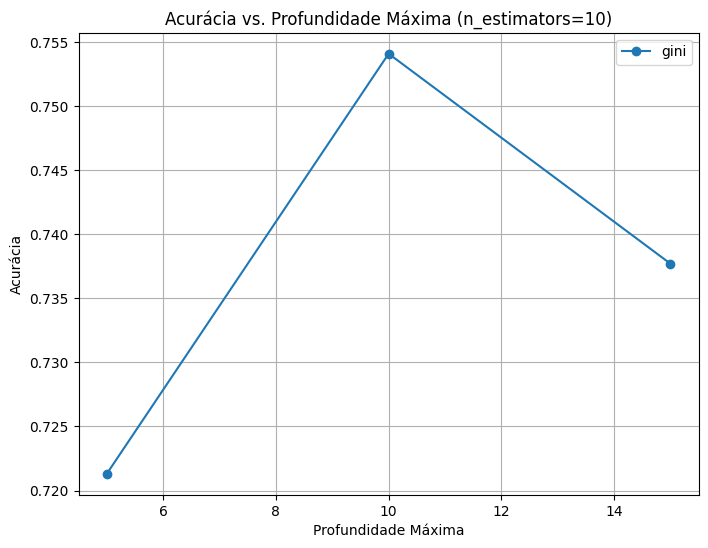

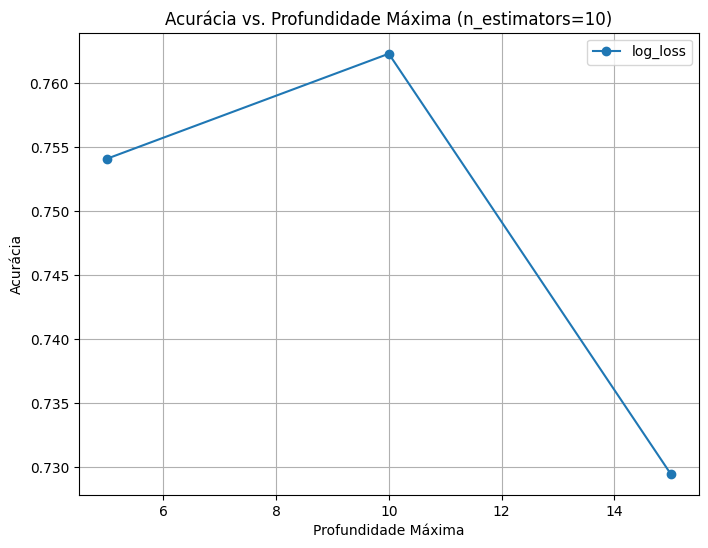

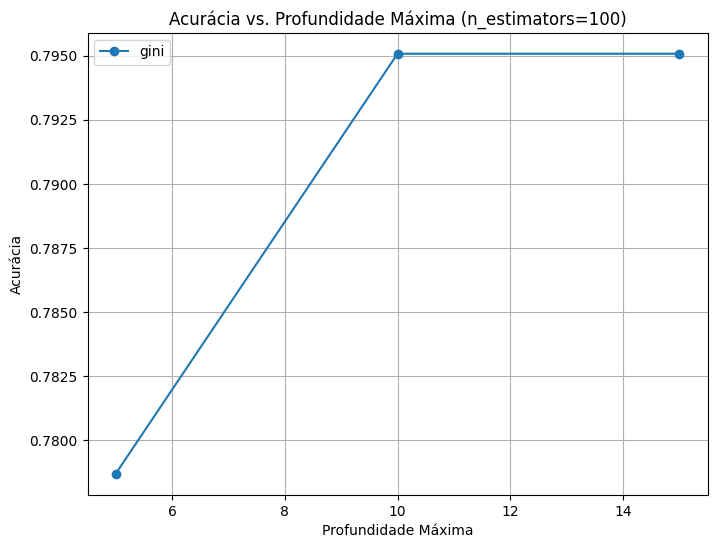

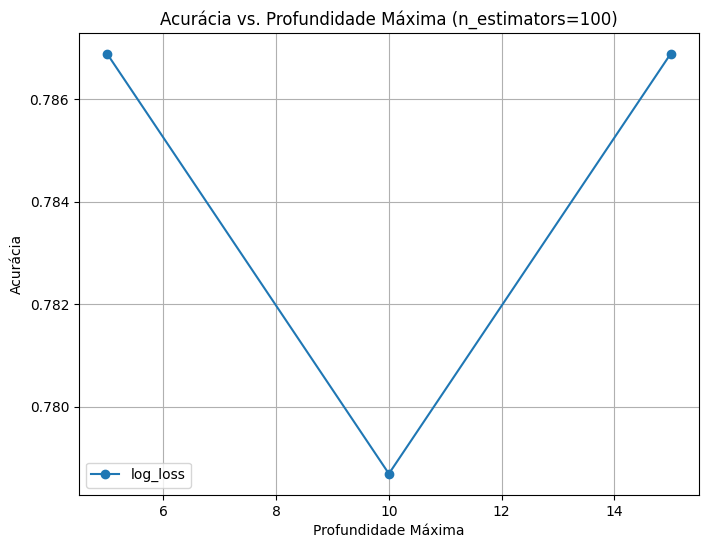

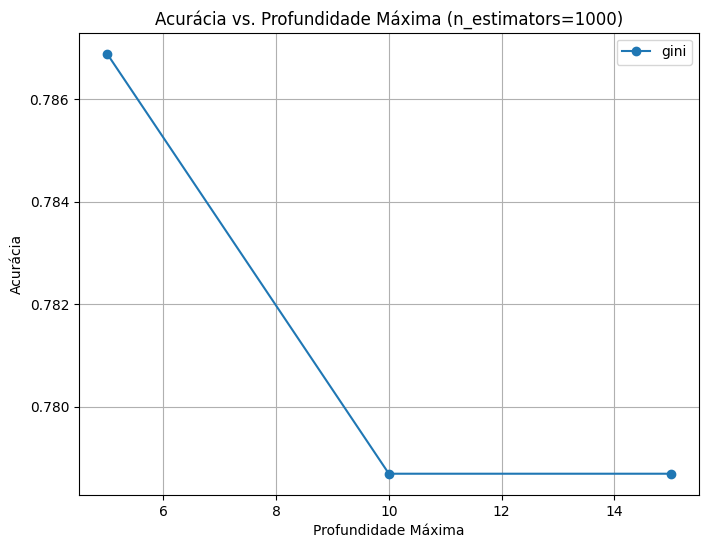

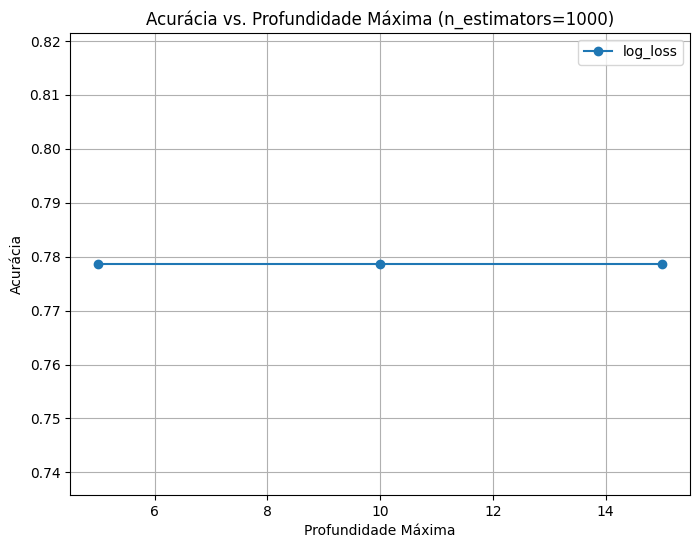

In [ ]:
# Hiperparâmetros a serem testados
n_estimators_values = [10, 100, 1000]
criterios = ['gini', 'log_loss']
max_depths = [None, 5, 10, 15]  # Adiciona profundidades máximas

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Dicionário para armazenar os resultados (estrutura melhorada)
resultados = {}

# Loop para testar diferentes combinações de hiperparâmetros
for n_estimators in n_estimators_values:
    for criterio in criterios:
        for max_depth in max_depths:
            # Cria e treina o modelo
            rf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterio,
                                       max_depth=max_depth, random_state=42)
            rf.fit(X_train, y_train)

            # Faz previsões e calcula a acurácia
            y_pred = rf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Armazena os resultados de forma mais organizada
            if (n_estimators, criterio) not in resultados:
                resultados[(n_estimators, criterio)] = {}
            resultados[(n_estimators, criterio)][max_depth] = accuracy

# Função para plotar os gráficos
def plot_accuracy(criterio, n_estimators):
    plt.figure(figsize=(8, 6))
    plt.plot(max_depths, [resultados[(n_estimators, criterio)][depth] for depth in max_depths], marker='o', label=criterio)
    plt.xlabel('Profundidade Máxima')
    plt.ylabel('Acurácia')
    plt.title(f'Acurácia vs. Profundidade Máxima (n_estimators={n_estimators})')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotando os gráficos para cada combinação de n_estimators e critério
for n_estimators in n_estimators_values:
    plot_accuracy('gini', n_estimators)
    plot_accuracy('log_loss', n_estimators)